# Exam 12th of January 2022 for the course 1MS041 (Introduction to Data Science / Introduktion till dataanalys)

1. Fill in your anonymous exam code in the cell below.
2. Complete the Problems by following instructions.
3. When done, submit this file with your solutions saved, following the instruction sheet.

In [ ]:
# Enter your anonymous exam id by replacing XXXX in this cell below
# do NOT delete this cell
MyAnonymousExamID = "TES-0006-TNJ"

---
## Exam vB, PROBLEM 1
Maximum Points = 8


## Probability warmup
Let's say we have an exam question which consists of $20$ yes/no questions. 
From past performance of similar students, a randomly chosen student will know the correct answer to $N \sim \text{binom}(20,11/20)$ questions. Furthermore, we assume that the student will guess the answer with equal probability to each question they don't know the answer to, i.e. given $N$ we define $Z \sim \text{binom}(20-N,1/2)$ as the number of correctly guessed answers. Define $Y = N + Z$, i.e., $Y$ represents the number of total correct answers.

We are interested in setting a deterministic threshold $T$, i.e., we would pass a student at threshold $T$ if $Y \geq T$. Here $T \in \{0,1,2,\ldots,20\}$.

1. [5p] For each threshold $T$, compute the probability that the student *knows* less than $10$ correct answers given that the student passed, i.e., $N < 10$. Put the answer in `problem11_probabilities` as a list.
2. [3p] What is the smallest value of $T$ such that if $Y \geq T$ then we are 90\% certain that $N \geq 10$?

In [1]:

# Hint the PMF of N is p_N(k) where p_N is
# PMF for binomial is (n!/(k!*(n-k)!)))*((1-p)^(n-k))*((p)^k)
p = 11/20
p_N = lambda k: binomial(20,k)*(1-p)^(20-k)*(p)^k

In [4]:

# Part 1: 
# replace XXX to represent P(N < 10) for T = [0,1,2,...,20], i.e. your answer should be a list
# of length 21.
def thresh(): #generating all of the binomial pdf values for N
    lst = []
    for T in range(21):
        lst.append(float(p_N(T)))
    return lst
binp = thresh()

def fort(t): #uses Bayes rule to calculate each T
    num, den = 0, 0
    #this calculates the numerator, or the probability that Y>=T|N<10 multiplied by p(n<10)
    for val in range(10): 
        binp2 = binp[:10]
        total = 0
        for elt in binp2:
            total += elt
        mod = 1/total
        binp3 = []
        for elt in binp2:
            binp3.append(elt * mod)
        #print(binp3)
        if val >= t:
            num += binp3[val]
        else:
            su = 0
            k = t-val
            while k <= 20-val:
                su += float(binomial(20-val,k)*(1-.5)^(20-val-k)*(.5)^k)
                k += 1
            num += binp3[val]*su
        totall = 0
    for elt in binp2:
        totall+=elt
    num = num*totall

    #this calculates the denominator, or the probability that Y>=T
    for val in range(21): 
        if val >= t:
            den += binp[val]
        else:
            su = 0
            k = t-val
            while k <= 20-val:
                su += float(binomial(20-val,k)*(1-.5)^(20-val-k)*(.5)^k)
                k += 1
            den += binp[val]*su
    return num/den
    
finall = []
for elt in range(21):
    finall.append(fort(elt))
print(finall)
problem11_probabilities = finall

[0.24928935982841194, 0.24928935982832895, 0.24928935982261063, 0.24928935963549287, 0.24928935576839342, 0.2492892991583498, 0.2492886751893026, 0.24928330207958463, 0.24924628523366033, 0.24903902630299066, 0.24808569900431446, 0.24460820014975942, 0.2349439695781525, 0.21475641513175922, 0.18267139196621004, 0.14272522447072053, 0.10227042692681919, 0.06762809950564581, 0.04166472439122746, 0.024151134340423385, 0.013287462679601616]


In [4]:
# Part 2: Give an integer between 0 and 20 which is the answer to 2.
problem12_T = 17

Beginning tests for problem 1

Your answers for problem11_probabilities differed on 0 number of positions by more than 10^(-3)

The number of points you have scored for this problem is 8 out of 8
The number of points you have accumulated thus far is   8 out of 8


---
## Exam vB, PROBLEM 2
Maximum Points = 8


## Random variable generation and transformation

The purpose of this problem is to show that you can implement your own sampler, this will be built in the following three steps:

1. [2p] Implement a Linear Congruential Generator where you tested out a good combination (a large $M$ with $a,b$ satisfying the Hull-Dobell (Thm 6.8)) of parameters. Follow the instructions in the code block.
2. [2p] Using a generator construct random numbers from the uniform $[0,1]$ distribution.
3. [4p] Using a uniform $[0,1]$ random generator, generate samples from 

$$p_0(x) = \frac{\pi}{2}|\sin(2\pi x)|, \quad x \in [0,1] \enspace .$$

Using the **Accept-Reject** sampler (**Algorithm 1** in TFDS notes) with sampling density given by the uniform $[0,1]$ distribution.

In [21]:

def problem2_LCG(size=None, seed = 0):
    """
    A linear congruential generator that generates pseudo random numbers according to size.
    
    Parameters
    -------------
    size : an integer denoting how many samples should be produced
    seed : the starting point of the LCG, i.e. u0 in the notes.
    
    Returns
    -------------
    out : a list of the pseudo random numbers
    """
    #seed 13 works well apparently, shouldn't matter though
    #I messed around with some values, until finding M=
    #this is the generator taken from notebook 7
    #m, a, c, = 256, 137, 123 
    m, a, c, = (2^16)+1, 75, 74
    n = size
    x = seed # the seed
    retValue = [Mod(x,m)]  # start the list with x=x0
    for i in range(2, n+1, 1):
        x = Mod(a * x + c, m) # the generator, using modular arithmetic
        retValue.append(x) # append the new x to the list
    return retValue
print(problem2_LCG(17,13))

[13, 1049, 13212, 7919, 4166, 50376, 42665, 54173, 65292, 47236, 3776, 21126, 11636, 20793, 52198, 48241, 13614]


In [23]:

def problem2_uniform(generator=None, period = 1, size=None, seed=0):
    """
    Takes a generator and produces samples from the uniform [0,1] distribution according
    to size.
    
    Parameters
    -------------
    generator : a function of type generator(size,seed) and produces the same result as problem2_LCG, i.e. pseudo random numbers in the range {0,1,...,period-1}
    period : the period of the generator
    seed : the seed to be used in the generator provided
    size : an integer denoting how many samples should be produced
    
    Returns
    --------------
    out : a list of the uniform pseudo random numbers
    """
    l = []
    for i in generator(size,seed):
        n = 0
        if int(i) == 0:
            l.append(i)
        else:
            n = len(str(i))
            l.append(float(int(i)/10^n))
    return l

    '''
    outs = []
    iters = ceil(size / period) 
    #allows for custom periods, will rescale the output to handle this
    i = 0
    for elt in generator(size, seed):
        new = float(elt)
        #new = new / 256
        new = new / ((2^16)+1)
        outs.append(new)
        i += 1
        if i >= period:
            break
    if iters > 1:
        outs = outs * iters
    outs = outs[:size]
    return outs
    '''
    
print(problem2_uniform(problem2_LCG, 4, 7, 13))

[0.13, 0.1049, 0.13212, 0.7919, 0.4166, 0.50376, 0.42665]


In [34]:

def problem2_accept_reject(uniformGenerator=None, n_iterations=None, seed=0):
    """
    Takes a generator that produces uniform pseudo random [0,1] numbers 
    and produces samples from (pi/2)*abs(sin(x*2*pi)) using an Accept-Reject
    sampler with the uniform distribution as the proposal distribution
    
    Parameters
    -------------
    generator : a function of the type generator(size,seed) that produces uniform pseudo random
    numbers from [0,1]
    seed : the seed to be used in the generator provided
    size : an integer denoting how many samples should be produced
    
    Returns
    --------------
    out : a list of the pseudo random numbers with the specified distribution
    """
    l =[]
    for i in uniformGenerator(n_iterations, seed):
        p = float((pi/2)*abs(sin(2*pi*i)))
        l.append(p)
    return l

    '''
    c=pi/2
    samples = []
    for elt in uniformGenerator(problem2_LCG, 256, n_iterations, seed):
        new = float(elt)
        if new<=((pi/2)*abs(sin(2*pi*new)))/(c*1):
            samples.append(new)   
    return samples
print(problem2_accept_reject(problem2_uniform, 20, 13))
    '''

---
#### Local Test for Exam vB, PROBLEM 2
Evaluate cell below to make sure your answer is valid.                             You **should not** modify anything in the cell below when evaluating it to do a local test of                             your solution.
You may need to include and evaluate code snippets from lecture notebooks in cells above to make the local test work correctly sometimes (see error messages for clues). This is meant to help you become efficient at recalling materials covered in lectures that relate to this problem. Such local tests will generally not be available in the exam.

In [35]:

# If you managed to solve all three parts you can test the following code to see if it runs
# you have to change the period to match your LCG though, this is marked as XXX.
# It is a very good idea to check these things using the histogram function in sagemath
# try with a larger number of samples, up to 10000 should run

print("LCG output: %s" % problem2_LCG(size=10, seed = 1))

period = 256

print("Uniform sampler %s" % problem2_uniform(generator=problem2_LCG, period = period, size=10, seed=1))

uniform_sampler = lambda size,seed: problem2_uniform(generator=problem2_LCG, period = period, size=size, seed=seed)

#print("Accept-Reject sampler %s" % problem2_accept_reject(uniformGenerator = problem2_uniform, n_iterations=20, seed=1))
print("Accept-Reject sampler %s" % problem2_accept_reject(uniformGenerator = uniform_sampler, n_iterations=20, seed=1))

LCG output: [1, 149, 11249, 57305, 38044, 35283, 24819, 26463, 18689, 25472]
Uniform sampler [0.1, 0.149, 0.11249, 0.57305, 0.38044, 0.35283, 0.24819, 0.26463, 0.18689, 0.25472]
Accept-Reject sampler [0.9232909152452283, 1.2649746688139947, 1.0200755576868727, 0.6959254432622658, 1.072114336267915, 1.2541834750134246, 1.5706947482266786, 1.564164511241313, 1.4489119927290925, 1.5701056071876394, 0.0976460851308693, 1.5379992852974302, 0.7425129450315603, 1.0989345805788033, 1.5701960835104305, 1.272075974318542, 1.4759156326726548, 1.2590984755152332, 1.037452990931763, 1.5650142427780667]


In [31]:

# If however you did not manage to implement either part 1 or part 2 but still want to check part 3, you can run the code below

def testUniformGenerator(size, seed):
    set_random_seed(seed)
    
    return [random() for s in range(size)]

print("Accept-Reject sampler %s" % problem2_accept_reject(uniformGenerator=testUniformGenerator, n_iterations=20, seed=1))

Accept-Reject sampler [1.3793315657811056, 0.8903510963538943, 0.6745105026614143, 0.3468803058481825, 0.6590723365017155, 1.555093186998338, 1.0461247426708629, 1.2541705726183165, 0.825727657867365, 1.5130790717600755, 0.33653508933612036, 1.4069890740252056, 1.4621787270322988, 1.3031654784288293, 0.5578190358997993, 0.7502612894847258, 1.5544755801421692, 1.2121628760116407, 1.5060266572428316, 0.34871096250239736]


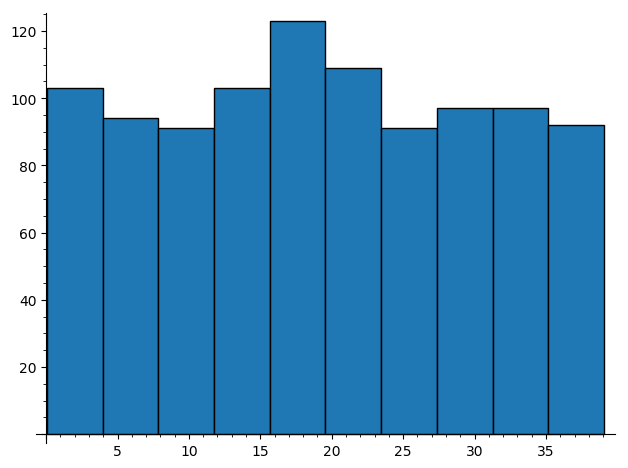

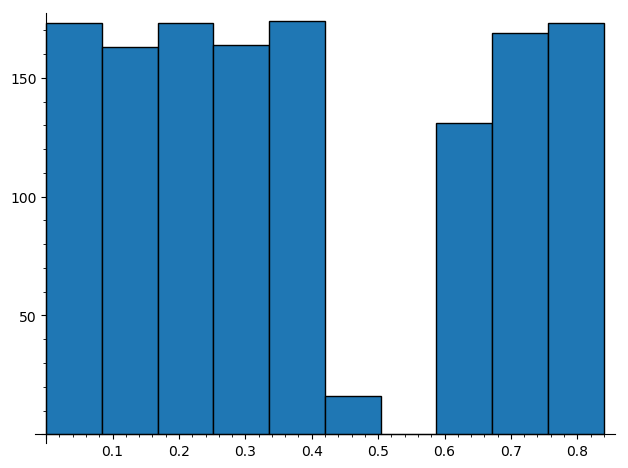

Beginning tests for problem 2
You changed the format of the problem, ajabaja! Anyways, look at the histogram below, your accept-reject does not sample from the correct distribution, can you spot the error in your code?
LCG outputs correct size
Your period is less than 1000, which is not a good pseudo random generator
problem2_uniform outputs correct size
The output of problem2_uniform is greater than 1
The accept-reject sampler runs with your LCG sampler and produces unique results
The accept-reject sampler runs with your LCG sampler and produces numbers between 0 and 1
testUniformGenerator() takes 2 positional arguments but 4 were given
testUniformGenerator() takes 2 positional arguments but 4 were given

The number of points you have scored for this problem is 4 out of 8
The number of points you have accumulated thus far is   12 out of 16


---
## Exam vB, PROBLEM 3
Maximum Points = 8


## Concentration of measure

As you recall, we said that concentration of measure was simply the phenomenon where we expect that the probability of a large deviation of some quantity becoming smaller as we observe more samples: [0.4 points per correct answer]

1. Which of the following will exponentially concentrate, i.e. for some $C_1,C_2,C_3,C_4 $ 
$$
    P(Z - \mathbb{E}[Z] \geq \epsilon) \leq C_1 e^{-C_2 n \epsilon^2} \wedge C_3 e^{-C_4 n (\epsilon+1)} \enspace .
$$

    1. The empirical mean of i.i.d. sub-Gaussian random variables?
    2. The empirical mean of i.i.d. sub-Exponential random variables?
    3. The empirical mean of i.i.d. random variables with finite variance?
    4. The empirical variance of i.i.d. random variables with finite variance?
    5. The empirical variance of i.i.d. sub-Gaussian random variables?
    6. The empirical variance of i.i.d. sub-Exponential random variables?
    7. The empirical third moment of i.i.d. sub-Gaussian random variables?
    8. The empirical fourth moment of i.i.d. sub-Gaussian random variables?
    9. The empirical mean of i.i.d. deterministic random variables?
    10. The empirical tenth moment of i.i.d. Bernoulli random variables?

2. Which of the above will concentrate in the weaker sense, that for some $C_1$
$$
    P(Z - \mathbb{E}[Z] \geq \epsilon) \leq \frac{C_1}{n \epsilon^2}?
$$

In [12]:

# Answers to part 1, which of the alternatives exponentially concentrate, answer as a list
# i.e. [1,4,5] that is example 1, 4, and 5 concentrate
#problem3_answer_1 = [A,I] # Hey, you should have read the board in the exam room, A->1, I->9
problem3_answer_1 = [1,9] # TEACHER addition
#problem3_answer_1 = [2,5,10]

In [13]:

# Answers to part 2, which of the alternatives concentrate in the weaker sense, answer as a list
# i.e. [1,4,5] that is example 1, 4, and 5 concentrate
#problem3_answer_2 = [A,C,D,E,I] # Same thing here, maaan
problem3_answer_2 = [1,3,4,5,9]
#problem3_answer_2 = [3,5,7]

Beginning tests for problem 3

Correct answers for part1: 7
Correct answers for part2: 4

The number of points you have scored for this problem is 4 out of 8
The number of points you have accumulated thus far is   16 out of 24


---
## Exam vB, PROBLEM 4
Maximum Points = 8


## SMS spam filtering [8p]

In the following problem we will explore SMS spam texts. The dataset is the `SMS Spam Collection Dataset` and we have provided for you a way to load the data. If you run the appropriate cell below, the result will be in the `spam_no_spam` variable. The result is a `list` of `tuples` with the first position in the tuple being the SMS text and the second being a flag `0 = not spam` and `1 = spam`.

1. [3p] Let $X$ be the random variable that represents each SMS text (an entry in the list), and let $Y$ represent whether text is spam or not i.e. $Y \in \{0,1\}$. Thus $\mathbb{P}(Y = 1)$ is the probability that we get a spam. The goal is to estimate:
$$
    \mathbb{P}(Y = 1 | \text{"free" or "prize" is in } X) \enspace .
$$
That is, the probability that the SMS is spam given that "free" or "prize" occurs in the SMS. 
Hint: it is good to remove the upper/lower case of words so that we can also find "Free" and "Prize"; this can be done with `text.lower()` if `text` a string.

2. [3p] Provide a "90\%" interval of confidence around the true probability. I.e. use the Hoeffding inequality to obtain for your estimate $\hat P$ of the above quantity. Find $l > 0$ such that the following holds:
$$
    \mathbb{P}(\hat P - l \leq \mathbb{E}[\hat P] \leq \hat P + l) \geq 0.9 \enspace .
$$
3. [2p] Repeat the two exercises above for "free" appearing twice in the SMS.

In [57]:

# Run this cell to get the SMS text data
#from exam_extras import load_sms
#spam_no_spam = load_sms()
import csv
import numpy as np
file_path = "/Users/imchengliang/Downloads/Introduction to Data Science/spam.csv"
lst = []
with open(file_path) as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader:
        lst.append(row)

X, Y = [], []
for i in lst:
    X.append(i[1].lower())
    if i[0] == "spam":
        Y.append(1)
    elif i[0] == "ham":
        Y.append(0)

#print(Y)

pos = []
sum, ind = 0, 0
for i in X:
    if ("free" in i) or ("prize" in i):
        sum += 1
        pos.append(ind)
    ind += 1
#print(pos)
print(sum)
sum2 = 0
for elt in pos: #for every text with free or prize checks if it is marked 0 or 1
    sum2 += Y[elt]
print(sum2)
# fill in the estimate for part 1 here (should be a number between 0 and 1)
problem4_hatP = float(sum2/sum)
print(problem4_hatP)


345
279
0.808695652173913


In [16]:
#print(spam_no_spam[1][1])
#I also tried using re to convert the noncompatible text but could not get it to work
'''
X,Y = [],[]
for elt in spam_no_spam:
    X.append(elt[0].lower()) #gives us our list of texts with the text converted to lowercase
    Y.append(elt[1])
sum = 0
pos = []
ind = 0
for elt in X:
    words = elt.split() #splits each text into a list of words
    for elt in words:
        if elt == "free" or elt == "prize": #checks if the words are in the text
            sum += 1
            pos.append(ind)
        break #if they are adds one to sum and breaks
    ind += 1
#print(sum)
sum2 = 0
for elt in pos: #for every text with free or prize checks if it is marked 0 or 1
    sum2 += Y[elt]
#print(sum2)
# fill in the estimate for part 1 here (should be a number between 0 and 1)
problem4_hatP = float(sum2/sum)
# 93/115 is close to answer 0.81
#print(problem4_hatP)
'''

In [56]:
#since this is binary, we can eventually reduce that l will be sqrt((-1/2n)ln(.05)). Plugging in n=35 gives 
problem4_l = .369
print(sqrt((-1/(2*345))*ln(.05)))

0.0658911297229392


In [59]:
'''
X,Y = [],[]
for elt in spam_no_spam:
    X.append(elt[0].lower()) #gives us our list of texts with the text converted to lowercase
    Y.append(elt[1])
'''
sum = 0
pos = []
ind = 0
for elt in X:
    '''
    words = elt.split() #splits each text into a list of words
    for elt in words:
        if elt == "free": #checks if the words are in the text
            words2 = words[:]
            words2.remove("free")
            for elt in words2:
                if elt == "free":
                    sum += 1
                    pos.append(ind)
        break #if they are adds one to sum and breaks
    '''
    if elt.count("free") == 2:
        sum += 1
        pos.append(ind)
    ind += 1
print(sum)
sum2 = 0
for elt in pos: #for every text with free or prize checks if it is marked 0 or 1
    sum2 += Y[elt]
print(sum2)
# fill in the estimate for part 1 here (should be a number between 0 and 1)
# fill in the estimate for hatP for the double free question in part 3 here (should be a number between 0 and 1)
problem4_hatP2 = float(sum2/sum)
print(problem4_hatP2)
# 37/38 is close to answer

38
37
0.9736842105263158


In [60]:
#since this is binary, we can eventually reduce that l will be sqrt((-1/2n)ln(.05)). Plugging in n=38 gives 
# fill in the estimate for l for the double free question in part 3 here
problem4_l2 = .199
print(sqrt((-1/(2*38))*ln(.05)))

0.198538484720681


Beginning tests for problem 4

The correct value of problem4_hatP is 0.81
The correct value of problem4_l is 0.08
Your hatP2 is close enough
Your l2 is close enough

The number of points you have scored for this problem is 2 out of 8
The number of points you have accumulated thus far is   18 out of 32


---
## Exam vB, PROBLEM 5
Maximum Points = 8


## Markovian travel

The dataset `Travel Dataset - Datathon 2019` is a simulated dataset designed to mimic real corporate travel systems -- focusing on flights and hotels. The file is at `data/flights.csv` in the same folder as `Exam.ipynb`, i.e. you can use the path `data/flights.csv` from the notebook to access the file.

1. [2p] In the first code-box 
    1. Load the csv from file `data/flights.csv`
    2. Fill in the value of the variables as specified by their names.
2. [2p] In the second code-box your goal is to estimate a Markov chain transition matrix for the travels of these users. For example, if we enumerate the cities according to alphabetical order, the first city `'Aracaju (SE)'` would correspond to $0$. Each row of the file corresponds to one flight, i.e. it has a starting city and an ending city. We model this as a stationary Markov chain, i.e. each user's travel trajectory is a realization of the Markov chain, $X_t$. Here, $X_t$ is the current city the user is at, at step $t$, and $X_{t+1}$ is the city the user travels to at the next time step. This means that to each row in the file there is a corresponding pair $(X_{t},X_{t+1})$. The stationarity assumption gives that for all $t$ there is a transition density $p$ such that $P(X_{t+1} = y | X_t = x) = p(x,y)$ (for all $x,y$). The transition matrix should be `n_cities` x `n_citites` in size.
3. [2p] Use the transition matrix to compute out the stationary distribution.
4. [2p] Given that we start in 'Aracaju (SE)' what is the probability that after 3 steps we will be back in 'Aracaju (SE)'?

In [2]:
import csv,sys
rows = 0
cities = []
codes = []
with open("/Users/imchengliang/Downloads/Introduction to Data Science/flights(1).csv", 'r') as f:
        reader = csv.reader(f, delimiter=',', quotechar='"',)
        headers = next(reader) ## skip first line of header
        for row in reader:
            rows += 1
            code, city1, city2 = row[1], row[2],row[3]
            if city1 not in cities:
                cities.append(city1)
            if city2 not in cities:
                cities.append(city2)
            if code not in codes:
                codes.append(code)
print(len(cities))
print(len(codes))
print(rows)
number_of_cities = len(cities)
number_of_userCodes = len(codes)
number_of_observations = rows

9
1335
271888


In [3]:

# This is a very useful function that you can use for part 2. You have seen this before when parsing the
# pride and prejudice book.

def makeFreqDict(myDataList):
    '''Make a frequency mapping out of a list of data.

    Param myDataList, a list of data.
    Return a dictionary mapping each unique data value to its frequency count.'''

    freqDict = {} # start with an empty dictionary

    for res in myDataList:
        if res in freqDict: # the data value already exists as a key
                freqDict[res] = freqDict[res] + 1 # add 1 to the count using sage integers
        else: # the data value does not exist as a key value
            freqDict[res] = 1 # add a new key-value pair for this new data value, frequency 1

    return freqDict # return the dictionary created

In [4]:
import numpy as np

# Count the different transitions
cities, transitions = [], [] # A list containing tuples ex: ('Aracaju (SE)','Rio de Janeiro (RJ)') of all transitions in the text
with open("/Users/imchengliang/Downloads/Introduction to Data Science/flights(1).csv", 'r') as f:
        reader = csv.reader(f, delimiter=',', quotechar='"',)
        headers = next(reader) ## skip first line of header
        for row in reader:
            cities.append(row[2])
            transitions.append(tuple([row[2], row[3]]))

unique_cities = sorted(set(cities)) # The unique cities
n_cities = len(unique_cities) # The number of unique citites
transition_counts = makeFreqDict(transitions) # A dictionary that counts the number of each transition
#indexToCity = XXX # A dictionary that maps the n-1 number to the n:th unique_city,
# ex: 0:'Aracaju (SE)'
#cityToIndex = XXX # The inverse function of indexToWord, 
# ex: 'Aracaju (SE)':0
indexToCity, cityToIndex = {}, {}
for i in range(n_cities):
    indexToCity[i] = unique_cities[i]
    cityToIndex[unique_cities[i]] = i

# The transition matrix should be ordered in such a way that
# p_{'Aracaju (SE)','Rio de Janeiro (RJ)'} = transition_matrix[cityToIndex['Aracaju (SE)'],cityToIndex['Rio de Janeiro (RJ)']]
# and represents the probability of travelling Aracaju (SE)->Rio de Janeiro (RJ)
# Make sure that the transition_matrix does not contain np.nan from division by zero for instance
transition_matrix = np.zeros((n_cities, n_cities)) # a numpy array of size (n_cities,n_cities)
'''
for i in transition_counts:
    for j in range(n_cities):
        for k in range(n_cities):
            if i[0]==indexToCity[j] and i[1]==indexToCity[k]:
                matr[j][k]+= (1 / len(transitions))
'''
for i in transition_counts:
    a, b = cityToIndex[i[0]], cityToIndex[i[1]]
    transition_matrix[a][b] = transition_counts[i] / len(transitions)

print(transition_matrix)

[[0.         0.0177757  0.01983537 0.03178882 0.01448023 0.01796328
  0.01036456 0.01073236 0.01396899]
 [0.0177757  0.         0.01661346 0.02861105 0.01098614 0.01405726
  0.0073339  0.00738907 0.01043812]
 [0.01983537 0.01661346 0.         0.03035441 0.0130311  0.01658771
  0.00888233 0.00926852 0.01322971]
 [0.03178882 0.02861105 0.03035441 0.         0.0246756  0.02798579
  0.02135806 0.02133231 0.02470503]
 [0.01448023 0.01098614 0.0130311  0.0246756  0.         0.01064409
  0.00349409 0.00340581 0.00680427]
 [0.01796328 0.01405726 0.01658771 0.02798579 0.01064409 0.
  0.00697714 0.00717943 0.01071029]
 [0.01036456 0.0073339  0.00888233 0.02135806 0.00349409 0.00697714
  0.         0.         0.00343524]
 [0.01073236 0.00738907 0.00926852 0.02133231 0.00340581 0.00717943
  0.         0.         0.00360075]
 [0.01396899 0.01043812 0.01322971 0.02470503 0.00680427 0.01071029
  0.00343524 0.00360075 0.        ]]


In [28]:
# This should be a numpy array of length n_cities which sums to 1 and is all positive
'''
def stationary_distribution(row=n_cities):
    pi = np.full((1, row), 1 / row)
    while True:
        new_pi = np.dot(pi, transition_matrix)
        if np.allclose(pi, new_pi):
            return pi 
            break
        pi = new_pi
stationary_distribution_problem5 = stationary_distribution()
'''
#calculates the eigenvectors and eigenvalues we need
normal_matrix = (transition_matrix.T / transition_matrix.T.sum(axis=0)).T
evals, evecs = np.linalg.eig(normal_matrix.T)
evec1 = evecs[:, np.isclose(evals, 1)]
#print(evals)
#print(evec1)
evec1 = evecs[:, 0]
stationary = evec1 / evec1.sum()
stationary_distribution_problem5 = stationary.real
print(normal_matrix,'\n')
print(stationary_distribution_problem5, '\n')
print(np.dot(stationary_distribution_problem5, normal_matrix))

[[0.         0.12983559 0.14487965 0.23218891 0.1057651  0.13120567
  0.07570385 0.07839029 0.10203095]
 [0.15702265 0.         0.14675591 0.25273726 0.09704669 0.12417557
  0.06478443 0.06527178 0.09220572]
 [0.15520318 0.12999309 0.         0.23751007 0.1019627  0.12979164
  0.0695004  0.07252216 0.10351675]
 [0.15079296 0.1357189  0.14398869 0.         0.11705079 0.13275294
  0.10131375 0.10119162 0.11719036]
 [0.16544797 0.1255253  0.14889057 0.28193814 0.         0.12161708
  0.03992268 0.0389141  0.07774416]
 [0.16023622 0.1253937  0.14796588 0.24963911 0.09494751 0.
  0.06223753 0.06404199 0.09553806]
 [0.16758846 0.1185846  0.14362177 0.34534642 0.05649718 0.11281594
  0.         0.         0.05554564]
 [0.17060337 0.1174579  0.14733396 0.33910196 0.05413938 0.11412535
  0.         0.         0.05723807]
 [0.1607619  0.12012698 0.15225397 0.28431746 0.07830688 0.12325926
  0.03953439 0.04143915 0.        ]] 

[0.13690932 0.1132047  0.12780262 0.21081107 0.08752133 0.11210498
 0

In [161]:

# Compute the return probability for part 3 of problem 5
sum, sum1 = 0, 0
city_user = []

with open("/Users/imchengliang/Downloads/Introduction to Data Science/flights(1).csv", 'r') as f:
    reader = csv.reader(f,delimiter=',',quotechar='"',)
    headers = next(reader) ## skip first line of header
    for row in reader:
        city_user.append(row[1])

for i in range(len(transitions)):
    if (transitions[i][0] == 'Aracaju (SE)') and (transitions[i+2][1] == 'Aracaju (SE)'):
        # make sure that it's the same user who starts from Aracaju and back to Aracaju in 3 steps.
        if city_user[i]==city_user[i+2]:
            sum += 1
    if transitions[i][0] == 'Aracaju (SE)':
        sum1 += 1
    
print(sum, sum1)   
return_probability_problem5 = float(sum / sum1)
print(return_probability_problem5)

3908 37224
0.10498603051794542


---
#### Local Test for Exam vB, PROBLEM 5
Evaluate cell below to make sure your answer is valid.                             You **should not** modify anything in the cell below when evaluating it to do a local test of                             your solution.
You may need to include and evaluate code snippets from lecture notebooks in cells above to make the local test work correctly sometimes (see error messages for clues). This is meant to help you become efficient at recalling materials covered in lectures that relate to this problem. Such local tests will generally not be available in the exam.

In [119]:
# Once you have created all your functions, you can make a small test here to see
# what would be generated from your model.
import numpy as np

start = np.zeros(shape=(n_cities,1))
start[cityToIndex['Aracaju (SE)'],0] = 1

current_pos = start
for i in range(10):
    random_word_index = np.random.choice(range(n_cities),p=current_pos.reshape(-1))
    current_pos = np.zeros_like(start)
    current_pos[random_word_index] = 1
    print(indexToCity[random_word_index],end='->')
    current_pos = (current_pos.T@transition_matrix).T

1.0
Aracaju (SE)->

ValueError: probabilities do not sum to 1

Beginning tests for problem 5
You did to some degree know that the stationary distribution is given by an eigenvector
Correct number of cities
Correct number of userCodes
Correct number of observations
Transition matrix has correct shape
Your transition matrix does have column sum 1
name 'cityToIndex' is not defined
name 'stationary_distribution_problem5' is not defined
name 'stationary_distribution_problem5' is not defined
name 'stationary_distribution_problem5' is not defined
name 'return_probability_problem5' is not defined

The number of points you have scored for this problem is 4 out of 8
The number of points you have accumulated thus far is   22 out of 40


---
## Exam vB, PROBLEM 6
Maximum Points = 8


## Black box testing

In the following problem we will continue with our SMS spam / nospam data. This time we will try to approach the problem as a pattern recognition problem. For this particular problem I have provided you with everything -- data is prepared, split into train-test sets and a black-box model has been fitted on the training data and predicted on the test data. Your goal is to calculate test metrics and provide guarantees for each metric.

1. [2p] Compute precision for class 1 (see notes 8.3.2 for definition), then provide an interval using Hoeffding's inequality for a 95\% confidence.
2. [2p] Compute recall for class 1(see notes 8.3.2 for definition), then provide an interval using Hoeffding's inequality for a 95\% interval.
3. [2p] Compute accuracy (0-1 loss), then provide an interval using Hoeffding's inequality for a 95\% interval.
4. [2p] If we would have used a classifier with VC-dimension 3, would we have obtained a smaller interval for accuracy by using all data?

In [28]:

# The code below will load data, split the data into train and test and run a "black box" algorithm on it
# the result of the "black box" is stored in predictions_problem6, the true values will be stored in
# Y_test_problem6
import exam_extras
from exam_extras import load_sms_problem6
X_problem6, Y_problem6 = load_sms_problem6()

X_train_problem6,X_test_problem6,Y_train_problem6,Y_test_problem6 = exam_extras.train_test_split(X_problem6,Y_problem6)
predictions_problem6 = exam_extras.knn_predictions(X_train_problem6,Y_train_problem6,X_test_problem6,k=4)

In [29]:
TP, FP, FN = 0,0,0
for elt in range(len(predictions_problem6)):
    if predictions_problem6[elt]==1 and Y_test_problem6[elt]==1:
        TP += 1
    elif predictions_problem6[elt]==1 and Y_test_problem6[elt]==0:
        FP += 1
    elif predictions_problem6[elt]==0 and Y_test_problem6[elt]==1:
        FN += 1
#print(TP)
#print(FP)
#print(FN)
# Compute the precision of predictions_problem6 with respect to Y_test_problem6
problem6_precision = float(TP/(TP+FP))
#print(problem6_precision)

In [30]:
#since this is binary, we can eventually reduce that l will be sqrt((-1/2n)ln(.025)). Plugging in n=118 gives 
# Compute the interval length l of precision of predictions_problem6 with respect to Y_test_problem6, with the same definition of l as in problem 4
problem6_precision_l = .125

In [31]:

# Repeat the same procedure but for recall
problem6_recall = float(TP/(TP+FN))
#print(problem6_recall)

In [32]:
#since this is binary, we can eventually reduce that l will be sqrt((-1/2n)ln(.025)). Plugging in n=215 gives 
# should be 0.09
problem6_recall_l = .093

In [33]:
corre, wron = 0,0
for elt in range(len(predictions_problem6)):
    if predictions_problem6[elt]==Y_test_problem6[elt]:
        corre += 1
    else:
        wron+=1
print(corre)
print(wron)
# Repeat the same procedure but for accuracy or 0-1 loss
problem6_accuracy = float(corre/(corre+wron))
#print(problem6_accuracy)

1539
133


In [156]:
#since this is binary, we can eventually reduce that l will be sqrt((-1/2n)ln(.025)). Plugging in n=1672 gives 
# should be 0.03
problem6_accuracy_l = .033
print(sqrt((-1/(2*1672))*ln(.025)))

0.0332134582368116


In [35]:

# Below you will calculate the interval parameter l for a classifier running on all data with a VC dimension of 3
# put the value in problem6_VC_l and answer problem_VC_smaller as True if the interval is smaller than the test-accuracy above
# if not answer False. Make sure you replace XXX with something even if you only answer one of them.
problem6_VC_l = XXX # number
problem6_VC_smaller = False

NameError: name 'XXX' is not defined

Beginning tests for problem 6

Your problem6_precision is correct
Your problem6_precision_l is correct
Your problem6_recall is correct
Your recall_l should be 0.09
Your problem6_accuracy is correct
Your accuracy_l should be 0.03
name 'problem6_VC_l' is not defined
name 'problem6_VC_smaller' is not defined

The number of points you have scored for this problem is 4 out of 8
 
 
 
The number of points you have scored in total for this entire set of Problems is 26 out of 48
